In [3]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import Series,DataFrame
from matplotlib import cm

print(np.version.full_version)
print(matplotlib.__version__)
print(pd.__version__)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6

1.15.4
2.1.1
0.23.4


<b>回帰分析 (Regression)</b>
<hr/>

$Y$ の予測値である仮定関数$h_\theta(x)$は以下のように

$h_\theta (x) = \theta_0 x_0 + \theta_1 x_1 + ... + \theta_n x_n = \theta^{\mathrm{T}} x$

<b>ロジスティック関数 (Logistic Function)、別名シグモイド関数 (Sigmoid Function)</b>
<hr/>

$g(z) = \frac{1}{1 + e^{-z}}$

<img src="https://camo.qiitausercontent.com/8eace57811edd9b16381bf3b87ad118c953dc1df/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3132323335342f64623633633030342d363264312d303430352d326463302d6238313865363434656239662e706e67">

<b>ロジスティック回帰 (Logistic Regression)</b>
<hr/>

$\large h_\theta (x)  = \frac{1}{1 + e^{-\theta^{\mathrm{T}} x}}$



<b>目的関数 (Cost Function)</b>
<hr/>

$\large J(\theta) = \frac{1}{2m}\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2$


$\large J(\theta) = - \frac{1}{m} [ \sum_{i=1}^m y^{(i)} log(h_\theta (x^{(i)})) + (1 - y^{(i)}) log(1 - h_\theta (x^{(i)}))]$


<b>最急降下法 (Gradient Descent)</b>
<hr/>

$\large \theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta_j}J(\theta)
             = \theta_j - \alpha \sum_{i=1}^m (h_\theta (x^{(i)}) - y^{(i)}) x_j ^{(i)}$
             
 

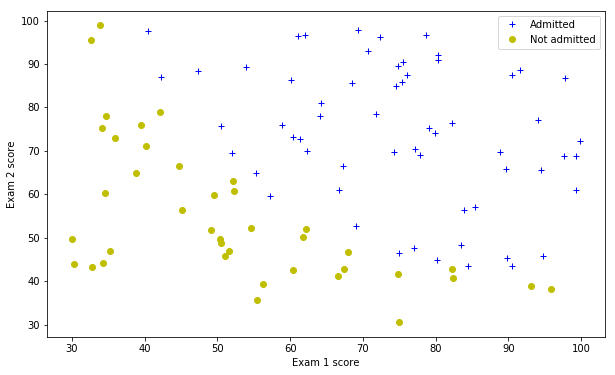

In [4]:
X_data = np.array([[34.6236596245169,78.0246928153624],[30.286710768226,43.894997524001],[35.8474087699387,72.9021980270836],[60.1825993862097,86.3085520954682],[79.0327360507101,75.3443764369103],[45.0832774766833,56.3163717815305],[61.1066645368476,96.5114258848962],[75.0247455673888,46.5540135411653],[76.0987867022625,87.420569719268],[84.4328199612003,43.533393310721],[95.8615550709357,38.2252780579509],[75.0136583895824,30.6032632342801],[82.3070533739948,76.481963302356],[69.3645887597093,97.718691961886],[39.5383391436722,76.0368108511588],[53.9710521485623,89.207350137502],[69.0701440628302,52.7404697301676],[67.9468554771161,46.6785741067312],[70.6615095549943,92.9271378936483],[76.9787837274749,47.5759636497553],[67.3720275457087,42.8384383202917],[89.6767757507207,65.7993659274523],[50.534788289883,48.855811527642],[34.2120609778678,44.2095285986628],[77.9240914545704,68.9723599933059],[62.2710136700463,69.9544579544758],[80.1901807509566,44.8216289321835],[93.114388797442,38.800670337132],[61.8302060231259,50.2561078924462],[38.7858037967942,64.9956809553957],[61.379289447425,72.8078873131709],[85.4045193941164,57.0519839762712],[52.1079797319398,63.1276237688171],[52.0454047683182,69.4328601204522],[40.2368937354511,71.1677480218487],[54.6351055542481,52.2138858806112],[33.9155001090688,98.8694357422061],[64.1769888749448,80.9080605867081],[74.7892529594154,41.5734152282443],[34.1836400264419,75.2377203360134],[83.9023936624915,56.3080462160532],[51.5477202690618,46.8562902634997],[94.4433677691785,65.5689216055905],[82.3687537571391,40.6182551597061],[51.0477517712886,45.82270145776],[62.2226757612018,52.0609919483667],[77.1930349260136,70.4582000018095],[97.7715992800023,86.7278223300282],[62.0730637966764,96.7688241241398],[91.5649744980744,88.6962925454659],[79.9448179406693,74.1631193504375],[99.2725269292572,60.9990309984498],[90.5467141139985,43.3906018065002],[34.5245138532,60.3963424583717],[50.2864961189907,49.8045388132305],[49.5866772163203,59.8089509945326],[97.6456339600776,68.861572724206],[32.577200168093,95.5985476138787],[74.2486913672159,69.8245712265719],[71.7964620586337,78.4535622451505],[75.3956114656803,85.7599366733161],[35.2861128152619,47.0205139472341],[56.2538174971162,39.2614725105801],[30.0588224466979,49.5929738672368],[44.6682617248089,66.4500861455891],[66.5608944724295,41.0920980793697],[40.4575509837516,97.5351854890993],[49.0725632190884,51.8832118207396],[80.2795740146699,92.1160608134408],[66.7467185694403,60.9913940274098],[32.7228330406032,43.3071730643006],[64.0393204150601,78.0316880201823],[72.3464942257992,96.227592967614],[60.4578857391895,73.0949980975803],[58.840956217268,75.8584483127904],[99.8278577969212,72.3692519338388],[47.2642691084817,88.4758649955978],[50.4581598028598,75.8098595298245],[60.4555562927153,42.5084094357221],[82.2266615778556,42.7198785371645],[88.9138964166533,69.8037888983547],[94.8345067243019,45.6943068025075],[67.3192574691752,66.5893531774791],[57.2387063156986,59.5142819801295],[80.3667560017127,90.9601478974695],[68.4685217859111,85.5943071045201],[42.0754545384731,78.8447860014804],[75.477702005339,90.4245389975396],[78.6354243489801,96.6474271688564],[52.348003987941,60.7695052560259],[94.0943311251679,77.1591050907389],[90.4485509709636,87.508791764847],[55.4821611406958,35.5707034722886],[74.4926924184304,84.8451368493013],[89.8458067072097,45.3582836109165],[83.4891627449823,48.3802857972817],[42.2617008099817,87.1038509402545],[99.3150088051039,68.7754094720661],[55.340017560037,64.9319380069486],[74.7758930009276,89.5298128951327]])
y = np.array([0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,1,1,1,1,1,0,0,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,1,1,1,1])

# データをプロットする
plt.plot(X_data[y==1, 0], X_data[y==1, 1], "b+", label="Admitted")
plt.plot(X_data[y==0, 0], X_data[y==0, 1], "yo", label="Not admitted")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

In [6]:
from sklearn.linear_model import LogisticRegression

# 組み込みロジスティック回帰
# デフォルトで正則化が入るのでCに十分大きな値を代入すると正則化なしと同等になる
regr = LogisticRegression(max_iter=400, C=1e10)
regr.fit(X_data, y)
print("Intercept : ", regr.intercept_)
print("Coef : ", regr.coef_)
print("Expected theta (approx):")
print(" -25.161\n 0.206\n 0.201\n")

# 具体的な値で予測
# predict_probaで確率の推定になる、predictは0か1の推定
prob = regr.predict_proba(np.array([45, 85]).reshape(1, -1)) 
print("For a student with scores 45 and 85, we predict an admission probability of ")
#1つ目の値はy=0である確率（要は不合格の確率）
print("[Not admitted, Admitted] = ", prob) 
print("Expected value of admitted: 0.775 +/- 0.002\n")

# 精度
print("Train Accuracy:")
print(regr.score(X_data, y)*100)
print("Expected accuracy (approx): 89.0")

Intercept :  [-24.9560464]
Coef :  [[0.20459008 0.19981009]]
Expected theta (approx):
 -25.161
 0.206
 0.201

For a student with scores 45 and 85, we predict an admission probability of 
[Not admitted, Admitted] =  [[0.22541844 0.77458156]]
Expected value of admitted: 0.775 +/- 0.002

Train Accuracy:
89.0
Expected accuracy (approx): 89.0


<b>自分で実装</b>

$ h_\theta (x)  = \frac{1}{1 + e^{-\theta^{\mathrm{T}} x}}$

$J(\theta) = - \frac{1}{m} [ \sum_{i=1}^m y^{(i)} log(h_\theta (x^{(i)})) + (1 - y^{(i)}) log(1 - h_\theta (x^{(i)}))]$

In [7]:
# コスト関数
def cost_function(theta, X, y):
    h_theta = 1 / (1 + np.exp(np.dot(-X, theta)))
    J = np.sum(-y * np.log(h_theta) - (1 - y) * np.log(1 - h_theta)) / len(y)
    grad = np.zeros(len(theta))
    for j in range(len(theta)):
        grad[j] = sum((h_theta - y) * X[:, j]) / len(y)
    return J, grad

In [8]:
# コストと勾配のテスト
X = np.c_[np.ones(len(y)), X_data]
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = cost_function(test_theta, X, y)
print("Cost at test theta:")
print(cost)
print("Expected cost (approx): 0.218")
print("Gradient at test theta:")
print(grad)
print("Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n")

Cost at test theta:
0.21833019382659688
Expected cost (approx): 0.218
Gradient at test theta:
[0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
 0.043
 2.566
 2.647



In [9]:
# fminで最適化
from scipy.optimize import fmin
initial_theta = np.zeros(X.shape[1])
# 複数の返り値を最適化できないので別の関数でラップ
cost_wrap = lambda theta,X,y : cost_function(theta, X, y)[0]
result = fmin(cost_wrap, initial_theta, args=(X, y, ), full_output=True, disp=False)
theta, cost = result[0], result[1]
print("Cost at theta found by fmin:", cost)
print("Expected cost (approx): 0.203")
print("theta:")
print(theta)
print("Expected theta (approx):")
print(" -25.161\n 0.206\n 0.201\n")

Cost at theta found by fmin: 0.20349770159021507
Expected cost (approx): 0.203
theta:
[-25.16130062   0.20623142   0.20147143]
Expected theta (approx):
 -25.161
 0.206
 0.201



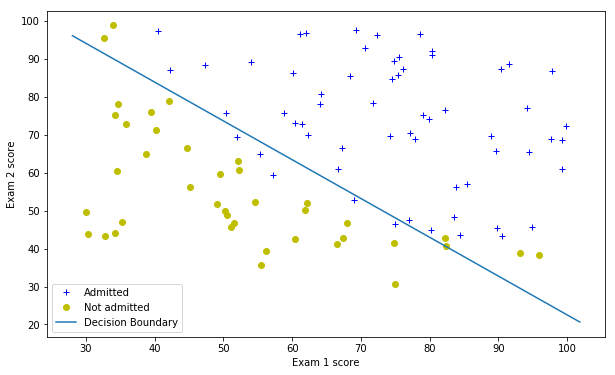

In [10]:
# 決定境界のプロット
plt.plot(X_data[y==1, 0], X_data[y==1, 1], "b+", label="Admitted")
plt.plot(X_data[y==0, 0], X_data[y==0, 1], "yo", label="Not admitted")
plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])
plot_y = (-1 / theta[2]) * (theta[1] * plot_x + theta[0])
plt.plot(plot_x, plot_y, label="Decision Boundary")
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.legend()
plt.show()

In [12]:
# シグモイド関数
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 予測用関数
def predict(theta, X):
    prob = sigmoid(np.dot(X, theta))
    return prob >= 0.5

# 予測と精度
prob = sigmoid(np.dot(np.array([1, 45, 85]), theta))
print("For a student with scores 45 and 85, we predict an admission probability of ")
print(prob)
print("Expected value: 0.775 +/- 0.002\n")

p = predict(theta, X)
print("Train Accuracy:")
print(np.mean(p == y)*100)
print("Expected accuracy (approx): 89.0")

For a student with scores 45 and 85, we predict an admission probability of 
0.7762915904112411
Expected value: 0.775 +/- 0.002

Train Accuracy:
89.0
Expected accuracy (approx): 89.0


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn import linear_model, grid_search
import matplotlib.pyplot as plt


X = np.linspace(-10, 10, 20)
Y = 0.001 * (X*X*X + X*X + X) + np.random.normal(0, 0.1, len(X))
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X[:, np.newaxis])

parameters1 = {'alpha' : np.logspace(-3, 1, 100)}
parameters2 = {'alpha' : np.logspace(1, 4, 100)}
parameters3 = {'alpha' : np.logspace(-3, 1, 100), 'l1_ratio' : np.logspace(-1, 0, 10)}

model_l1 = grid_search.GridSearchCV(linear_model.LassoLars(), parameters1, cv=10)
model_l1.fit(X_poly, Y)
print("Lasso Regresion : ")
print(model_l1.best_params_)
print(model_l1.best_estimator_.coef_)

model_l2 = grid_search.GridSearchCV(linear_model.Ridge(), parameters2, cv=10)
model_l2.fit(X_poly, Y)
print("Ridge Regresion : ")
print(model_l2.best_params_)
print(model_l2.best_estimator_.coef_)

model_el = grid_search.GridSearchCV(linear_model.ElasticNet(), parameters3, cv=10)
model_el.fit(X_poly, Y)
print("Elastic Net : ")
print(model_el.best_params_)
print(model_el.best_estimator_.coef_)

xs = np.linspace(-10, 10, 200)
Y_predict_1 = model_l1.predict(poly.fit_transform(xs[:, np.newaxis]))
Y_predict_2 = model_l2.predict(poly.fit_transform(xs[:, np.newaxis]))
Y_predict_3 = model_el.predict(poly.fit_transform(xs[:, np.newaxis]))

plt.plot(X, Y, ".", color="k")
plt.plot(xs, Y_predict_1, "-", color="r", label="Lasso")
plt.plot(xs, Y_predict_2, "-", color="b", label="Ridge")
plt.plot(xs, Y_predict_3, "-", color="g", label="Elastic Net")
plt.legend(loc="lower left")
plt.show()

Lasso Regresion : 
{'alpha': 0.004862601580065354}
[0.         0.01222634 0.         0.00074943 0.         0.
 0.         0.         0.         0.         0.        ]


C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 9.082849275351284e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.51093031942303e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.59510858860239e-20 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8321458145017949e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.8045812264144175e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.8588834281805137e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\li

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.800702214806516e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 7.733718248458546e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 8.2823248847149455e-19 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\lina

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.2498911185009103e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.4124844994606718e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.3469769342242268e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\li

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.811582267942494e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.710441823521014e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.6713376097959866e-18 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\lina

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.9824976714484624e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.192436210576469e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 1.2224078858648101e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\lin

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.433106748434194e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 3.3814557430220964e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\linalg\basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 5.573152093194352e-17 / 1.1102230246251565e-16
  RuntimeWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\lina

Ridge Regresion : 
{'alpha': 141.74741629268047}
[ 0.00000000e+00  1.48635466e-03  8.96270210e-04  1.86310073e-03
  8.47167730e-04 -4.16630351e-05 -3.70010122e-05  6.67908051e-07
  5.09848712e-07 -3.51231808e-09 -2.24246137e-09]


C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model

C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\s.shin\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model